# 问题定义  
> 背景
- 某个医院记录了一批病人乳腺细胞的特征
- 包括:细胞的平均半径,面积,致密度,光滑度...等
- 标签:诊断结果
> 问题
- 如何根据历史数据,确定新的问诊这的检查结果?

## 导入医疗数据集

In [1]:
import pandas as pd
data = pd.read_csv('某地乳腺检查数据.csv')
data.head()

,ID,诊断结果,平均半径,平均纹理,平均周长,平均面积,平均光滑度,平均致密度,平均凹度,平均凹点数,...,最差半径,最差纹理,最差周长,最差面积,最差光滑度,最差致密度,最差凹度,最差凹点数,最差对称性,最差分形维度
0,842302,确诊,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,确诊,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,8510426,健康,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,15.11,19.26,99.70,711.2,0.1440,0.1773,0.2390,0.12880,0.2977,0.07259
3,8510653,健康,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.50,20.49,96.09,630.5,0.1312,0.2776,0.1890,0.07283,0.3184,0.08183
4,84300903,确诊,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758


#### 诊断结果分布柱状图

In [3]:
# 设置X和y
y = data["诊断结果"]
#只保留因变量做X
X = data.drop(["诊断结果", "ID"], axis=1)
X

,平均半径,平均纹理,平均周长,平均面积,平均光滑度,平均致密度,平均凹度,平均凹点数,平均对称性,平均分形维度,...,最差半径,最差纹理,最差周长,最差面积,最差光滑度,最差致密度,最差凹度,最差凹点数,最差对称性,最差分形维度
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902
2,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.2390,0.12880,0.2977,0.07259
3,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.1890,0.07283,0.3184,0.08183
4,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.24300,0.3613,0.08758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400


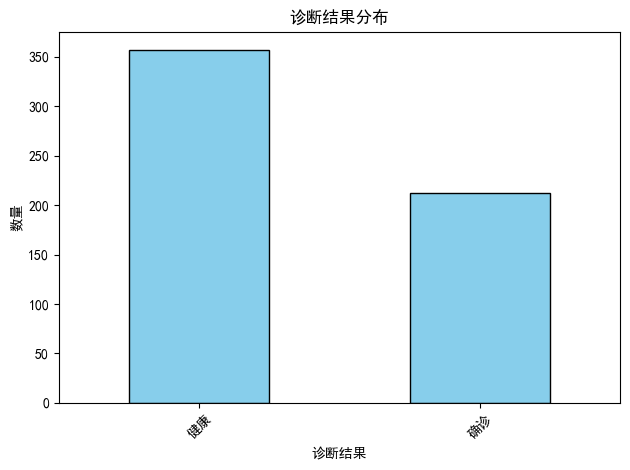

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']=['SimHei']
plt.rcParams['font.sans-serif']=['SImHei']
plt.rcParams['axes.unicode_minus']=False

#显示y的柱状图
y.value_counts().plot(kind='bar',color='skyblue',edgecolor='black')
plt.title('诊断结果分布')
plt.xlabel('诊断结果')
plt.ylabel('数量')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 查看X的统计特征的数值信息,观察数据范围

In [5]:
X.describe()

,平均半径,平均纹理,平均周长,平均面积,平均光滑度,平均致密度,平均凹度,平均凹点数,平均对称性,平均分形维度,...,最差半径,最差纹理,最差周长,最差面积,最差光滑度,最差致密度,最差凹度,最差凹点数,最差对称性,最差分形维度
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### 查看X的特征名称

In [6]:
features = X.columns
features

Index(['平均半径', '平均纹理', '平均周长', '平均面积', '平均光滑度', '平均致密度', '平均凹度', '平均凹点数',
       '平均对称性', '平均分形维度', '半径的标准误差', '纹理的标准误差', '周长的标准误差', '面积的标准误差',
       '光滑度的标准误差', '致密度的标准误差', '凹度的标准误差', '凹点数的标准误差', '对称性的标准误差', '分形维度的标准误差',
       '最差半径', '最差纹理', '最差周长', '最差面积', '最差光滑度', '最差致密度', '最差凹度', '最差凹点数',
       '最差对称性', '最差分形维度'],
      dtype='object')

#### encode标签(y)的值(转成0,1)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['诊断结果'] = le.fit_transform(data['诊断结果'])

In [10]:
data['诊断结果'] 

0      1
1      1
2      0
3      0
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: 诊断结果, Length: 569, dtype: int32

#### 特征值(X)的标准化(缩放)

In [11]:
X=data.drop(['ID','诊断结果'],axis=1)
y=data['诊断结果']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 先计算X_train 上数据的均值和标准差
X_train=scaler.fit_transform(X_train)
# 使用之前在 X_train 上计算得到的均值和标准差对 X_test 进行标准化。
X_test=scaler.fit_transform(X_test)

X_train[:5],y_train[:5]

(array([[-1.44463663, -0.44189887, -1.36569672, -1.14405401,  0.79556112,
          0.72570266,  2.82904435, -0.11870049,  1.10554478,  2.47945356,
         -0.26524748, -0.01517239, -0.47102864, -0.47712901,  0.84956947,
          3.24485534,  8.44264289,  3.39077466,  2.62001608,  2.06404492,
         -1.2353396 , -0.4844966 , -1.25037683, -0.97798548,  0.73310523,
          1.18357383,  4.67523915,  0.92632205,  2.10269766,  1.8959969 ],
        [ 1.96586584,  1.73087608,  2.08446863,  1.84599187,  1.33849141,
          3.44164384,  2.01813392,  2.66078624,  2.14441745,  1.57522   ,
          0.80467245, -0.81185091,  0.75283751,  0.87500085, -0.88682402,
          1.17903729,  0.18647919,  0.60249588, -0.3167389 ,  0.53191461,
          2.15772138,  1.30714169,  2.06865461,  2.12349474,  0.77232393,
          3.25957862,  1.93007619,  2.68654284,  1.89590784,  2.51003428],
        [-1.40391759, -1.25786522, -1.34883857, -1.11473154, -1.33200171,
         -0.30382853, -0.36314302, -

#### 可以看到特征数据分布在一个比较小的区间, 利于机器学习  
> 观察前后数据的对比分布图

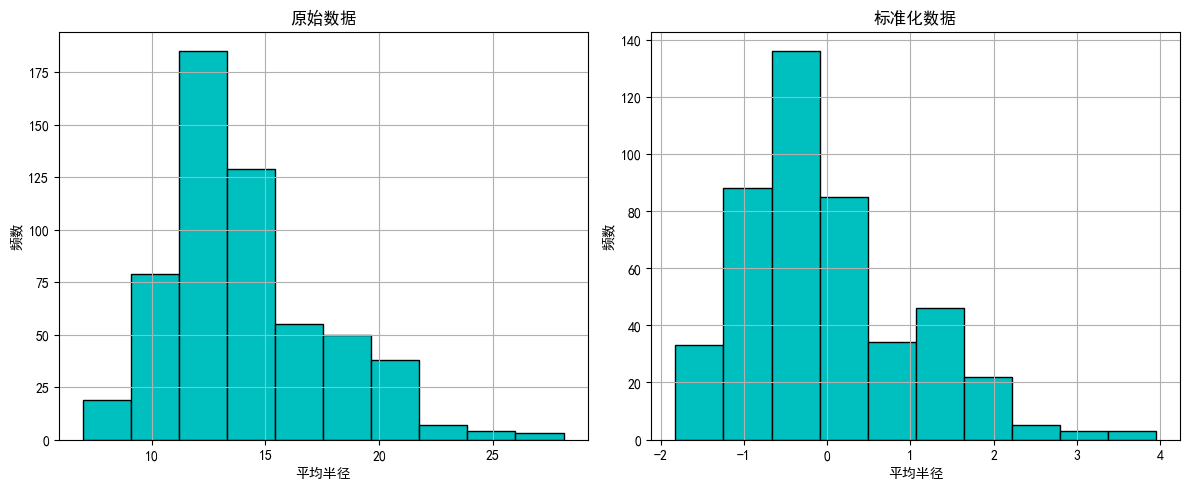

In [14]:
feature = '平均半径'

original_feature=X[feature]
standardized_feature = pd.DataFrame(X_train,columns=X.columns)[feature]

fig,axes = plt.subplots(1,2,figsize=(12,5))
original_feature.hist(ax=axes[0],color='c',edgecolor='black')
axes[0].set_title('原始数据')
axes[0].set_xlabel(feature)
axes[0].set_ylabel('频数')

standardized_feature.hist(ax=axes[1],color='c',edgecolor='black')
axes[1].set_title('标准化数据')
axes[1].set_xlabel(feature)
axes[1].set_ylabel('频数')

plt.tight_layout()
plt.show()

## 使用逻辑回归算法(分类算法)训练模型,并评估模型

In [23]:
from sklearn.linear_model import LogisticRegression
'''
在这里，设置了 random_state 为 42，以便结果能够在每次运行时保持一致。
这意味着模型在相同数据上进行训练时产生的随机性将是可预测的，有助于结果的可重复性。
'''
logreg = LogisticRegression(random_state=42)

In [24]:
# 训练模型(使用训练集特征和标签)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [20]:
# 进行预测(用测试集进行预测)
y_pred = logreg.predict(X_test)

In [26]:
# 评估预测结果
#导入metric评估机器学习模型的性能
from sklearn.metrics import accuracy_score,classification_report
#计算精确率(真实类别标签,模型预测标签)
accuracy_log = accuracy_score(y_test,y_pred)
#生成分类性能报告(真实类别标签,模型预测标签)
classification_rep_log = classification_report(y_test,y_pred)

print(accuracy_log,"\n"),
print(classification_rep_log)

0.9824561403508771 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



- 它计算并返回一个包含精确率、召回率、F1 值等指标的文本报告，用于评估模型的分类性能。  
- 这些指标和报告能够帮助你了解模型的性能，包括模型的整体准确率、每个类别的预测准确率、召回率和 F1 值等信息。
- 这些信息有助于评估模型的优劣，并确定模型是否需要进一步优化或调整。

## 使用决策树算法训练模型,并评估模型

In [27]:
# 导入并初始化模型
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# 训练模型
dt.fit(X_train, y_train)

# 进行预测
y_pred_dt = dt.predict(X_test)

# 评估预测结果
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print(accuracy_dt,"\n"), 
print(classification_rep_dt)

0.9035087719298246 

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        72
           1       0.84      0.90      0.87        42

    accuracy                           0.90       114
   macro avg       0.89      0.90      0.90       114
weighted avg       0.91      0.90      0.90       114



## 使用随机森林算法训练模型,并评估模型

In [28]:
#导入初始化模型
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# 训练模型
rf.fit(X_train,y_train)

# 进行预测
y_pred_rf=rf.predict(X_test)

# 评估预测结果
accuracy_rf=accuracy_score(y_test,y_pred_rf)
classification_rep_rf=classification_report(y_test,y_pred_rf)

print(accuracy_rf,"\n")
print(classification_rep_rf)


0.9649122807017544 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## 使用混淆矩阵分析不同模型的性能指标,并用热力图体现

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

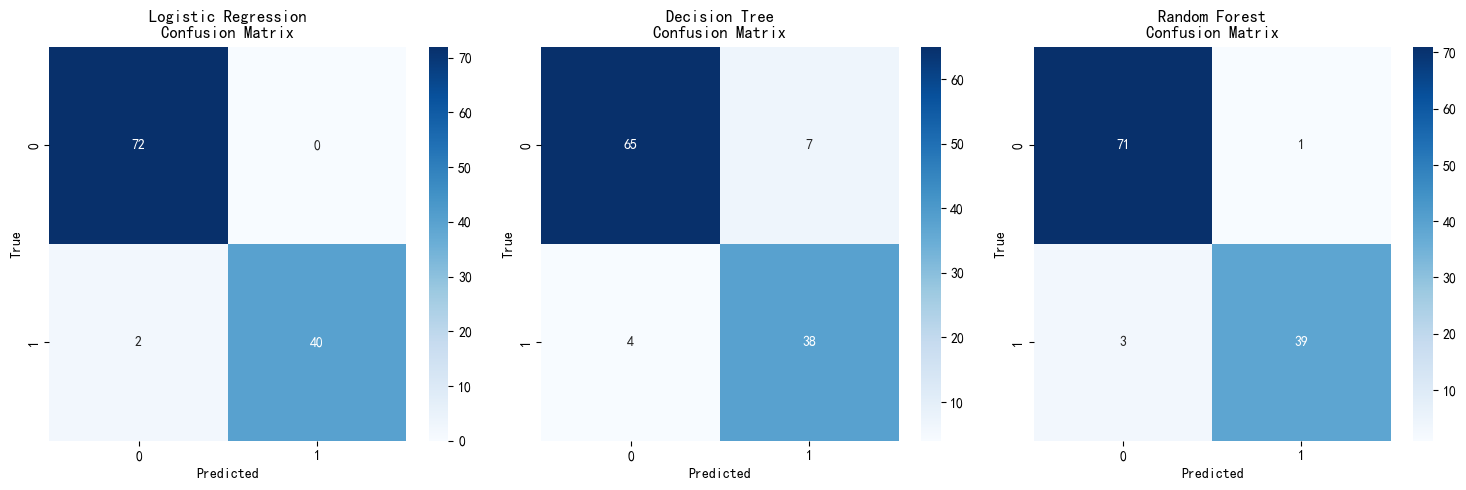

In [31]:
# 计算混淆矩阵
cm_logreg = confusion_matrix(y_test,y_pred)
cm_dt = confusion_matrix(y_test,y_pred_dt)
cm_rf= confusion_matrix(y_test,y_pred_rf)

# 显示混淆矩阵
fig, axes = plt.subplots(1,3,figsize=(15,5))

#使用热力图
sns.heatmap(cm_logreg,annot=True,fmt='d',cmap='Blues',ax=axes[0])
axes[0].set_title('Logistic Regression\nConfusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(cm_dt,annot=True,fmt='d',cmap='Blues',ax=axes[1])
axes[1].set_title('Decision Tree\nConfusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Random Forest\nConfusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

plt.tight_layout()
plt.show()

## 评估各模型的precision_score, recall_score, f1_score,并用条形图做整体展示

[1.0, 0.8444444444444444, 0.975]


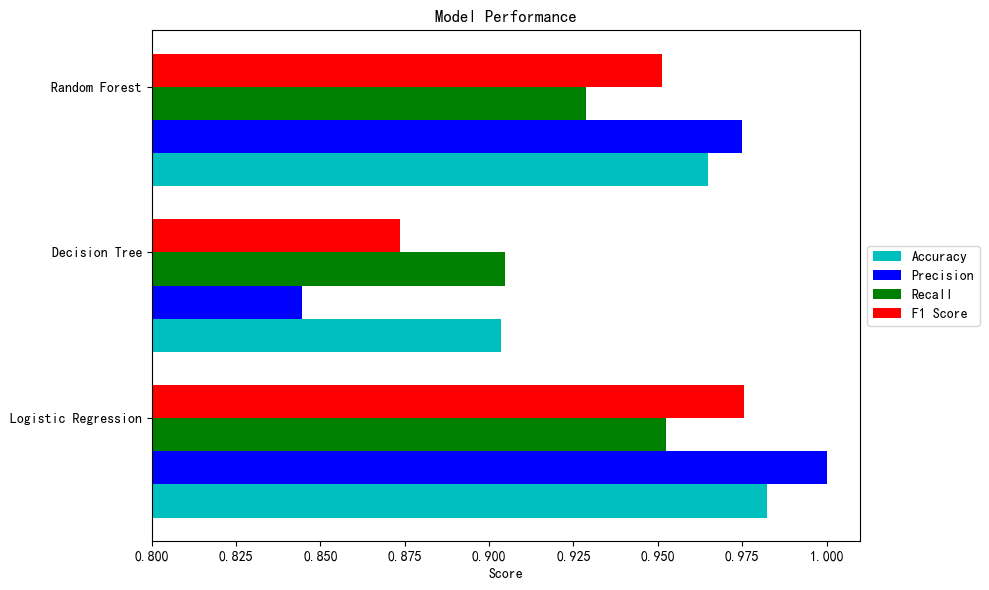

In [40]:
from sklearn.metrics import precision_score,recall_score,f1_score

#计算其他评估指标
models = ['Logistic Regression','Decision Tree','Random Forest']
y_preds=[y_pred,y_pred_dt,y_pred_rf]

accuracies=[accuracy_score(y_test,y_pred) for y_pred in y_preds]
precisions=[precision_score(y_test,y_pred) for y_pred in y_preds]
recalls=[recall_score(y_test,y_pred) for y_pred in y_preds]
f1_scores = [f1_score(y_test, y_pred) for y_pred in y_preds]
print(precisions)
# 把这些评估指标整体展示
fig, ax = plt.subplots(figsize=(10,6))

x = range(len(models))
ax.barh(x, accuracies, color='c', height=0.2, label='Accuracy')
ax.barh([p + 0.2 for p in x], precisions, color='b', height=0.2, label='Precision')
ax.barh([p + 0.4 for p in x], recalls, color='g', height=0.2, label='Recall')
ax.barh([p + 0.6 for p in x], f1_scores, color='r', height=0.2, label='F1 Score')

ax.set_xlabel('Score')
ax.set_title('Model Performance')
ax.set_yticks([p + 0.5 for p in x])
ax.set_yticklabels(models)
ax.set_xlim(0.80, 1.01)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [36]:
accuracies, precisions, recalls, f1_scores

([0.9824561403508771, 0.9035087719298246, 0.9649122807017544],
 [1.0, 0.8444444444444444, 0.975],
 [0.9523809523809523, 0.9047619047619048, 0.9285714285714286],
 [0.975609756097561, 0.8735632183908046, 0.951219512195122])